# Data Visualization Agent - Example Runs

This notebook demonstrates the data visualization agent with reflection pattern.

The agent:
1. Accepts a dataset (CSV file or URL) and visualization request
2. Uses Claude Haiku 4.5 to generate Plotly visualization code
3. Uses Claude Sonnet 4.5 to critique the generated chart (vision-based)
4. Iteratively improves the visualization based on feedback
5. Returns the final chart and code

## Setup

In [1]:
# Import necessary libraries
import sys
import os
from pathlib import Path

# Add parent directory to path if needed
parent_dir = str(Path.cwd().parent)
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

from dataviz_agent.agent import run_dataviz_agent
from IPython.display import Image, display, HTML
import json

In [2]:
# Helper function to display results nicely
def display_result(result):
    """Display agent result with chart and metadata."""
    if result["status"] == "error":
        print(f"❌ Error: {result['error_message']}")
        return

    print(f"\n{'='*80}")
    print(f"RESULT SUMMARY")
    print(f"{'='*80}")
    print(f"Status: {result['status']}")
    print(f"Iterations: {result['iteration_count']}")
    print(f"Dataset: {result['dataset_rows']} rows × {result['dataset_columns']} columns")
    print(f"Final Chart: {result['final_chart_path']}")
    print(f"\n{'='*80}\n")

    # Display the final chart
    display(HTML("<h3>Final Chart</h3>"))
    display(Image(filename=result['final_chart_path']))

    # Display iteration details
    print(f"\n{'='*80}")
    print(f"ITERATION DETAILS")
    print(f"{'='*80}\n")

    for iteration in result['all_iterations']:
        print(f"--- Iteration {iteration['iteration']} ---")
        print(f"Chart: {iteration['chart_path']}")

        if iteration['critique']:
            print(f"\nCritique:")
            print(f"  Accuracy: {iteration['critique'].get('accuracy_feedback', 'N/A')[:100]}...")
            print(f"  Should Continue: {iteration['critique'].get('should_continue', 'N/A')}")

            suggestions = iteration['critique'].get('improvement_suggestions', [])
            if suggestions:
                print(f"  Improvements: {len(suggestions)} suggestions")

        print()

    # Display final code
    print(f"\n{'='*80}")
    print(f"FINAL CODE")
    print(f"{'='*80}\n")
    print(result['final_code'])
    print()

## Example 1: Coffee Sales Analysis

Using the coffee sales dataset from the reflection/visualization-agent example.

In [3]:
# Example 1: Coffee Sales
result1 = run_dataviz_agent(
    csv_source="./coffee_sales.csv",
    user_request="Create a chart showing year-over-year Q1 sales by drink type",
    dataset_description="Coffee shop sales data including date, time, payment type, drink name, price, and fiscal quarter/year information",
    max_iterations=3,
    generation_model="claude-haiku-4-5-20251001",
    critique_model="claude-sonnet-4-5-20250929",
    output_dir="./outputs/example1",
    output_basename="coffee_sales",
    verbose=True,
)


DATAVIZ AGENT - Starting

[1/7] Loading dataset from: ./coffee_sales.csv
  ✓ Loaded 3636 rows and 6 columns

[2/7] Preparing dataset information
  ✓ Using provided dataset description

[3/7] Generating initial chart code using claude-haiku-4-5-20251001
  ✓ Generated initial code (2352 chars)

[4/7] Executing initial code
  ✓ Chart saved to: ./outputs/example1/coffee_sales_v1.png

[5/7] Starting refinement loop (max 3 iterations)

  --- Iteration 1/3 ---
  [5.1.1] Critiquing chart with claude-sonnet-4-5-20250929
  ✓ Received critique feedback
  Should continue: True
  [5.1.2] Improving code based on feedback
  ✓ Generated improved code (4272 chars)
  [5.1.3] Executing improved code
  ✓ Improved chart saved to: ./outputs/example1/coffee_sales_v2.png

  --- Iteration 2/3 ---
  [5.2.1] Critiquing chart with claude-sonnet-4-5-20250929
  ✓ Received critique feedback
  Should continue: True
  [5.2.2] Improving code based on feedback
  ✓ Generated improved code (4527 chars)
  [5.2.3] Executin


RESULT SUMMARY
Status: success
Iterations: 4
Dataset: 3636 rows × 8 columns
Final Chart: ./outputs/example1/coffee_sales_final.png




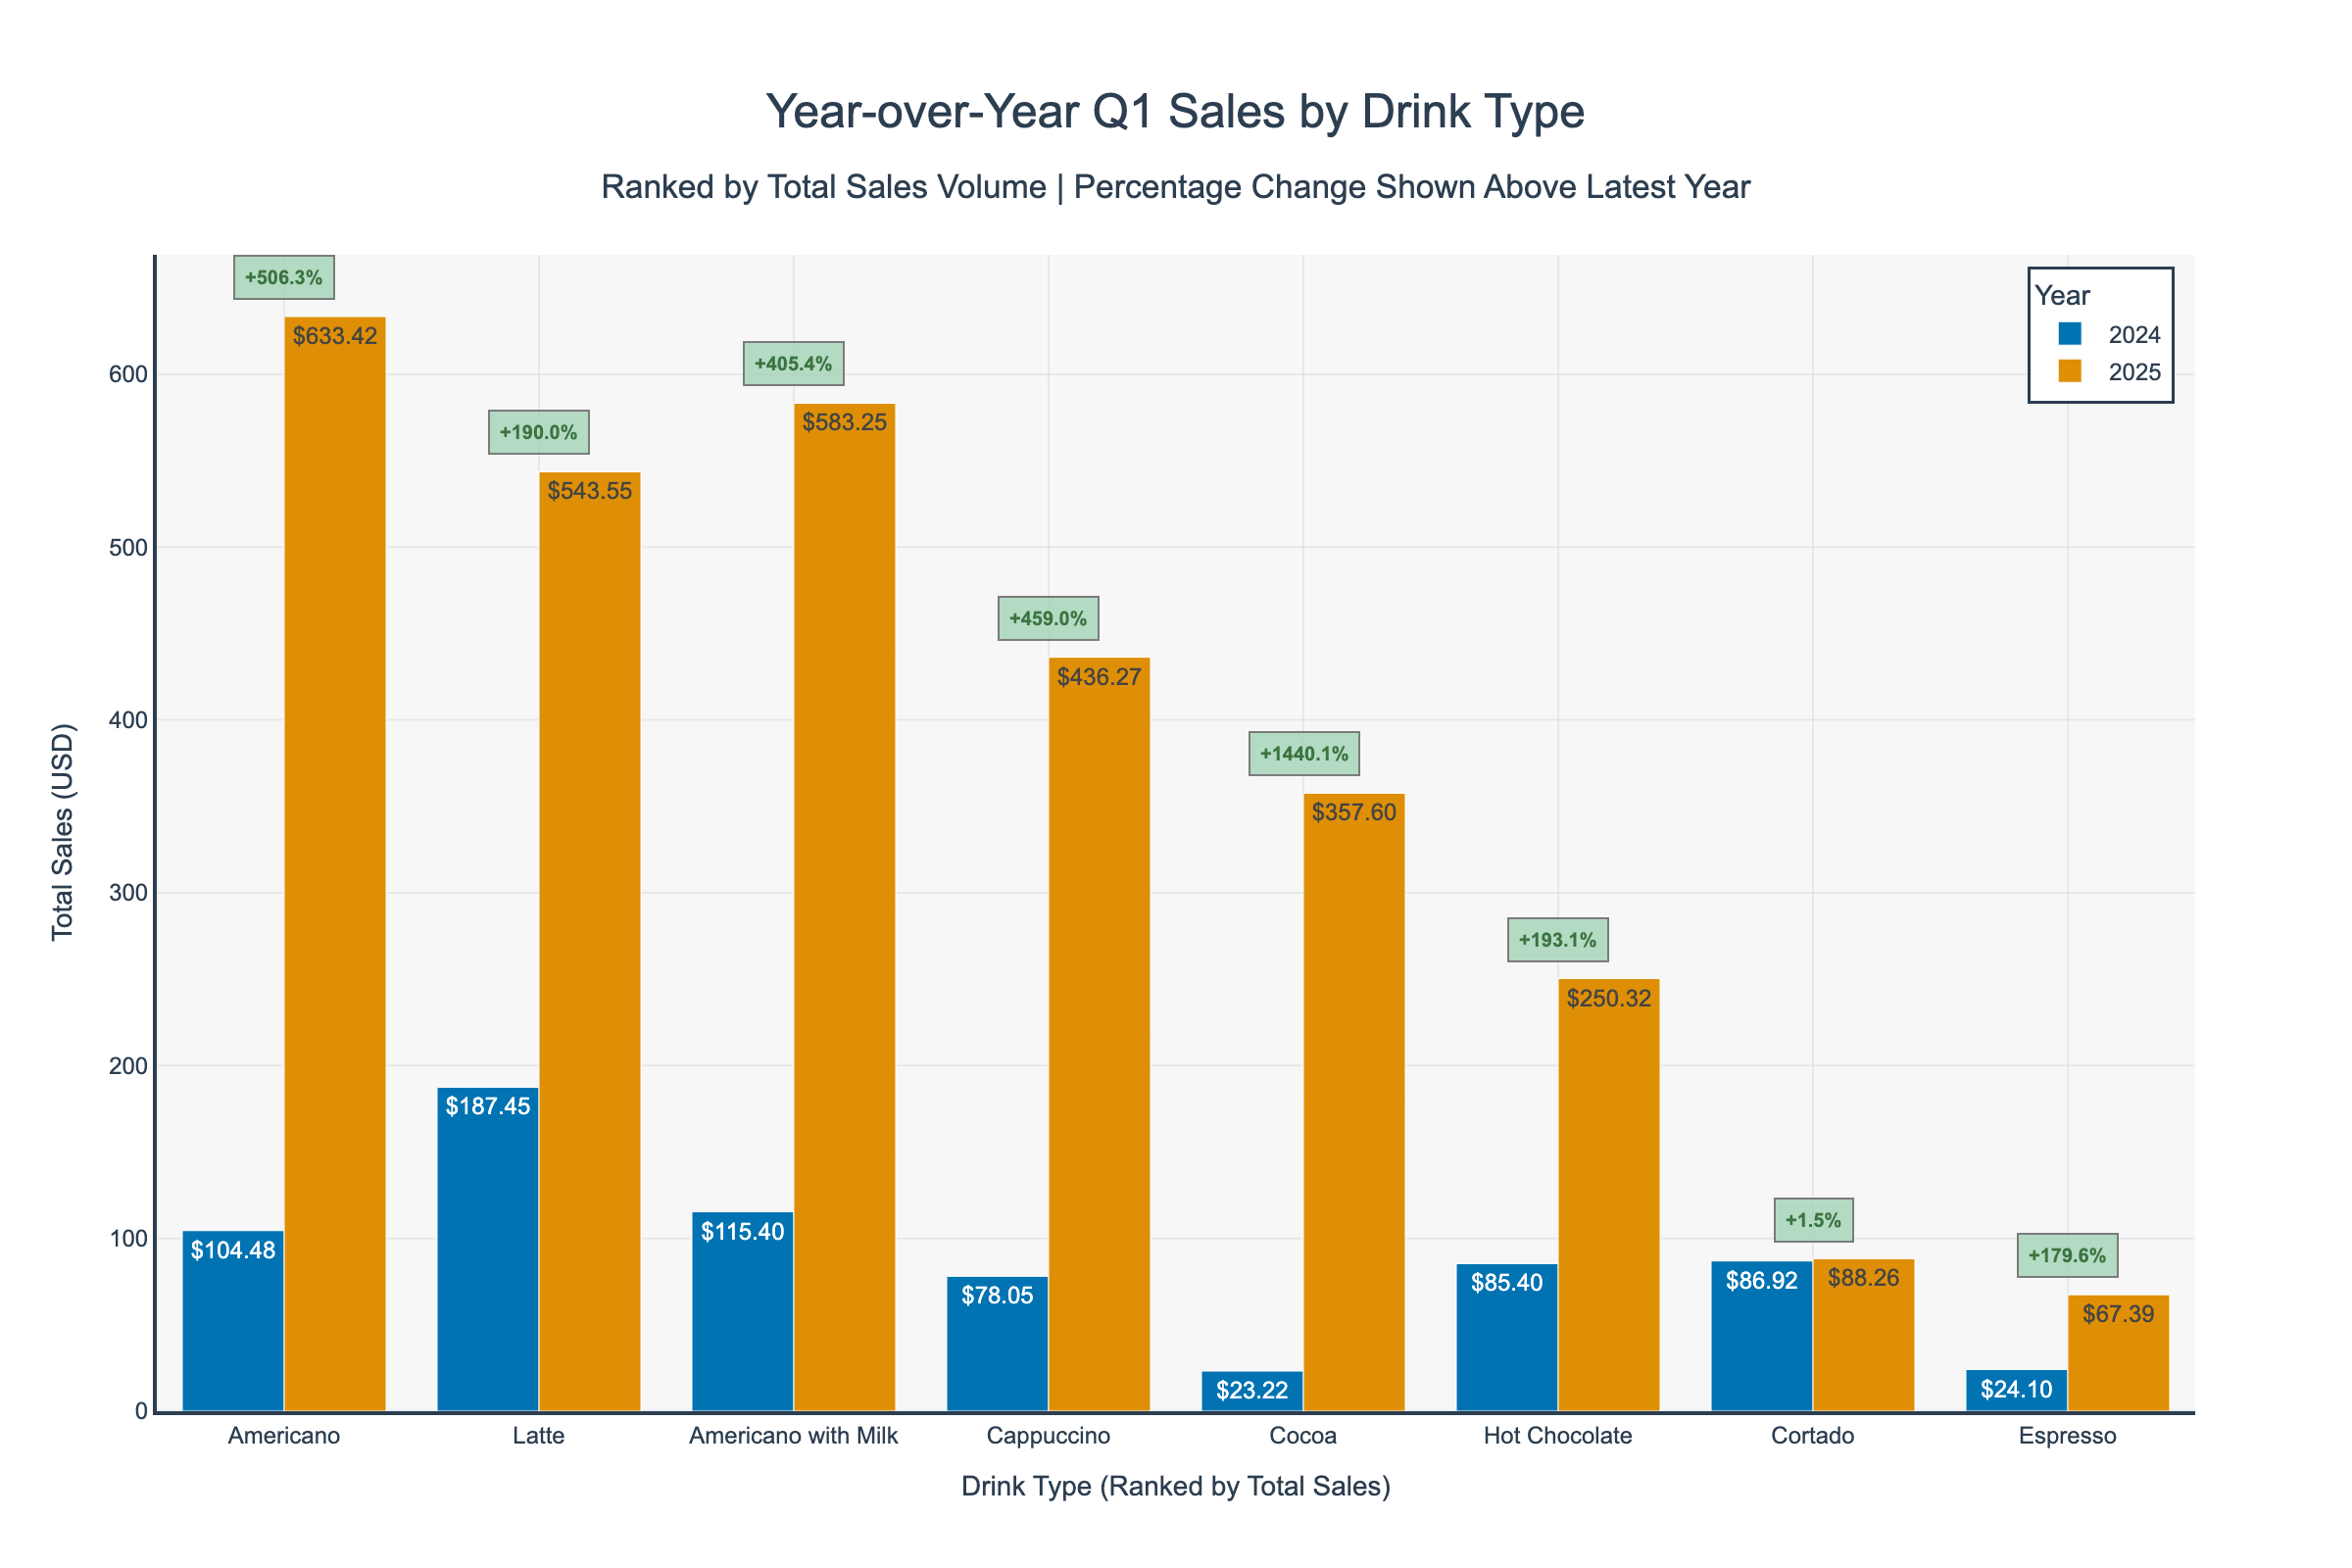


ITERATION DETAILS

--- Iteration 0 ---
Chart: ./outputs/example1/coffee_sales_v1.png

--- Iteration 1 ---
Chart: ./outputs/example1/coffee_sales_v2.png

Critique:
  Accuracy: The chart correctly displays year-over-year Q1 sales by drink type, comparing 2024 and 2025 data. Th...
  Should Continue: True
  Improvements: 3 suggestions

--- Iteration 2 ---
Chart: ./outputs/example1/coffee_sales_v3.png

Critique:
  Accuracy: The chart correctly answers the user's request by showing year-over-year Q1 sales data by drink type...
  Should Continue: True
  Improvements: 3 suggestions

--- Iteration 3 ---
Chart: ./outputs/example1/coffee_sales_v4.png

Critique:
  Accuracy: The chart correctly answers the user's request by showing year-over-year Q1 sales data by drink type...
  Should Continue: True
  Improvements: 3 suggestions


FINAL CODE

import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extra

In [4]:
# Display results
display_result(result1)

## Example 2: Customer Churn Analysis

Analyzing customer churn reasons from a Kaggle-style dataset.

Note: This example assumes you have a customer churn CSV. If not, we'll create a sample dataset.

In [ ]:
# Create a sample customer churn dataset
import pandas as pd
import numpy as np

np.random.seed(42)

# Generate sample customer churn data
n_customers = 1000

churn_reasons = [
    "Better Price Elsewhere",
    "Poor Customer Service",
    "Product Quality Issues",
    "Found Better Alternative",
    "Too Expensive",
    "Moved to Competitor",
    "Service Not Needed Anymore",
    "Technical Issues",
]

# Generate weights for realistic distribution
weights = [0.25, 0.20, 0.15, 0.15, 0.10, 0.08, 0.05, 0.02]

churn_data = pd.DataFrame({
    'customer_id': range(1, n_customers + 1),
    'churn_reason': np.random.choice(churn_reasons, n_customers, p=weights),
    'months_as_customer': np.random.randint(1, 60, n_customers),
    'monthly_charges': np.random.uniform(20, 200, n_customers),
    'customer_satisfaction': np.random.randint(1, 6, n_customers),
})

# Save to CSV
os.makedirs('./outputs/example2', exist_ok=True)
churn_data.to_csv('./outputs/example2/customer_churn.csv', index=False)

print(f"Created sample churn dataset with {len(churn_data)} customers")
print(f"\nFirst few rows:")
churn_data.head()

In [ ]:
# Example 2: Customer Churn Analysis
result2 = run_dataviz_agent(
    csv_source="./outputs/example2/customer_churn.csv",
    user_request="Visualize all customer churn reasons with percentage breakdown, showing the proportion of customers for each reason",
    dataset_description="Customer churn data including churn reasons, tenure, monthly charges, and satisfaction scores",
    max_iterations=3,
    generation_model="claude-haiku-4-5-20251001",
    critique_model="claude-sonnet-4-5-20250929",
    output_dir="./outputs/example2",
    output_basename="churn_analysis",
    verbose=True,
)

In [ ]:
# Display results
display_result(result2)

## Example 3: Sales Performance Dashboard

Creating a comprehensive sales performance visualization.

In [ ]:
# Create a sample sales performance dataset
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

np.random.seed(42)

# Generate sample sales data
start_date = datetime(2023, 1, 1)
end_date = datetime(2024, 12, 31)
date_range = pd.date_range(start_date, end_date, freq='D')

regions = ['North', 'South', 'East', 'West']
products = ['Product A', 'Product B', 'Product C', 'Product D']

sales_records = []

for date in date_range:
    for region in regions:
        # Add some seasonality and trend
        base_sales = 10000 + (date.month * 500) + np.random.normal(0, 1000)

        sales_records.append({
            'date': date.strftime('%Y-%m-%d'),
            'region': region,
            'product': np.random.choice(products),
            'sales_amount': max(0, base_sales + np.random.normal(0, 2000)),
            'units_sold': np.random.randint(50, 500),
        })

sales_data = pd.DataFrame(sales_records)

# Save to CSV
os.makedirs('./outputs/example3', exist_ok=True)
sales_data.to_csv('./outputs/example3/sales_performance.csv', index=False)

print(f"Created sample sales dataset with {len(sales_data)} records")
print(f"Date range: {sales_data['date'].min()} to {sales_data['date'].max()}")
print(f"\nFirst few rows:")
sales_data.head()

In [ ]:
# Example 3: Sales Performance by Region
result3 = run_dataviz_agent(
    csv_source="./outputs/example3/sales_performance.csv",
    user_request="Create a chart showing monthly sales trends by region over time, with clear comparison between all four regions",
    dataset_description="Daily sales data including date, region, product, sales amount, and units sold across four geographic regions",
    max_iterations=3,
    generation_model="claude-haiku-4-5-20251001",
    critique_model="claude-sonnet-4-5-20250929",
    output_dir="./outputs/example3",
    output_basename="sales_trends",
    verbose=True,
)

In [ ]:
# Display results
display_result(result3)

## Example 4: Using a URL Source

Demonstrating how to use a CSV from a URL (if available).

In [ ]:
# Example 4: Dataset from URL
# Using a public dataset URL

# Note: This is an example - replace with an actual CSV URL if you want to test
csv_url = "https://raw.githubusercontent.com/plotly/datasets/master/iris.csv"

result4 = run_dataviz_agent(
    csv_source=csv_url,
    user_request="Create a scatter plot showing the relationship between sepal length and sepal width, colored by species",
    dataset_description="Iris flower dataset with measurements of sepal and petal dimensions for three species",
    max_iterations=2,
    generation_model="claude-haiku-4-5-20251001",
    critique_model="claude-sonnet-4-5-20250929",
    output_dir="./outputs/example4",
    output_basename="iris_scatter",
    verbose=True,
)

In [ ]:
# Display results
display_result(result4)

## Summary

These examples demonstrate:

1. **Coffee Sales Analysis**: Time-series visualization with categorical grouping
2. **Customer Churn**: Categorical breakdown with percentages
3. **Sales Performance**: Multi-region trend comparison
4. **URL Source**: Using remote CSV data

### Key Takeaways

- The agent automatically refines visualizations based on critique
- Vision-based critique allows the model to see and evaluate the actual chart
- Iterative improvement leads to better titles, labels, colors, and overall design
- The agent can work with both local files and URLs
- Different chart types (bar, line, scatter, pie) are automatically selected based on the data and request

### Customization Options

You can customize:
- `max_iterations`: How many refinement rounds (default: 3)
- `generation_model`: Which model generates code (default: Haiku 4.5)
- `critique_model`: Which model critiques (default: Sonnet 4.5)
- `output_dir`: Where to save results
- `verbose`: Whether to print progress messages